In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from pandas_profiling import ProfileReport

C:\Users\ahmed\AppData\Local\Temp/ipykernel_15624/2290891118.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# loading the dataset
df = pd.read_csv('listings.csv')

In [3]:
# exploring dataset
df.head()

id                                               name  host_id  \
0  27934  Condo in Samsen Nai · ★4.85 · 1 bedroom · 1 be...   120437   
1  27979  Rental unit in Bangkok · 1 bedroom · 2 beds · ...   120541   
2  28745  Rental unit in Bangkok · 1 bedroom · 1 bed · 1...   123784   
3  35780  Rental unit in Bangkok · ★4.75 · 1 bedroom · 1...   153730   
4  48736  Rental unit in Bangkok · 1 bedroom · 1 bed · 1...   222005   

    host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0      Nuttee                  NaN   Ratchathewi  13.75983  100.54134   
1         Emy                  NaN       Bang Na  13.66818  100.61674   
2  Familyroom                  NaN     Bang Kapi  13.75232  100.62402   
3     Sirilak                  NaN     Din Daeng  13.78823  100.57256   
4    Athitaya                  NaN    Rat Burana  13.68556  100.49535   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt   1937               3                 65  2020-01-06   
1     Private room   1338               1                  0         NaN   
2     Private room    800              60                  0         NaN   
3     Private room   1286               7                  4  2023-04-03   
4     Private room   1585               3                  1  2014-02-03   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.48                               2               269   
1                NaN                               2                 0   
2                NaN                               1                 0   
3               0.05                               1               358   
4               0.01                               1               365   

   number_of_reviews_ltm  license  
0                      0      NaN  
1                      0      NaN  
2                      0      NaN  
3                      2      NaN  
4                      0      NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18879 entries, 0 to 18878
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18879 non-null  int64  
 1   name                            18879 non-null  object 
 2   host_id                         18879 non-null  int64  
 3   host_name                       18879 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   18879 non-null  object 
 6   latitude                        18879 non-null  float64
 7   longitude                       18879 non-null  float64
 8   room_type                       18879 non-null  object 
 9   price                           18879 non-null  int64  
 10  minimum_nights                  18879 non-null  int64  
 11  number_of_reviews               18879 non-null  int64  
 12  last_review                     

In [5]:
df.drop(['neighbourhood_group','license'],inplace=True,axis= 1)

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [7]:
df.head()

id                                               name  host_id  \
0  27934  Condo in Samsen Nai · ★4.85 · 1 bedroom · 1 be...   120437   
1  27979  Rental unit in Bangkok · 1 bedroom · 2 beds · ...   120541   
2  28745  Rental unit in Bangkok · 1 bedroom · 1 bed · 1...   123784   
3  35780  Rental unit in Bangkok · ★4.75 · 1 bedroom · 1...   153730   
4  48736  Rental unit in Bangkok · 1 bedroom · 1 bed · 1...   222005   

    host_name neighbourhood  latitude  longitude        room_type  price  \
0      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   1937   
1         Emy       Bang Na  13.66818  100.61674     Private room   1338   
2  Familyroom     Bang Kapi  13.75232  100.62402     Private room    800   
3     Sirilak     Din Daeng  13.78823  100.57256     Private room   1286   
4    Athitaya    Rat Burana  13.68556  100.49535     Private room   1585   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               3                 65  2020-01-06               0.48   
1               1                  0         NaN                NaN   
2              60                  0         NaN                NaN   
3               7                  4  2023-04-03               0.05   
4               3                  1  2014-02-03               0.01   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               269                      0  
1                               2                 0                      0  
2                               1                 0                      0  
3                               1               358                      2  
4                               1               365                      0

In [8]:
df[['last_review','reviews_per_month']]= df[['last_review','reviews_per_month']].fillna('0')

### Exploratory analysis Report

In [9]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### How many rooms in each type?

In [10]:
df['room_type'].value_counts()

Entire home/apt    11290
Private room        6503
Hotel room           603
Shared room          483
Name: room_type, dtype: int64

<AxesSubplot:xlabel='room_type', ylabel='count'>

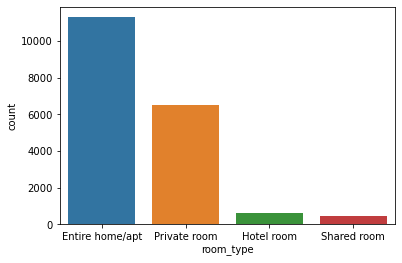

In [11]:
sns.countplot(x='room_type',data=df)

### What are the avg, min and max for the price of each room type?

In [23]:
df.groupby('room_type')['price'].agg(['mean','min','max'])

mean  min      max
room_type                                 
Entire home/apt  2734.479894  136  1000000
Hotel room       3186.786070  330   300000
Private room     2482.298939  272   300000
Shared room      1130.824017  278    75000

<AxesSubplot:xlabel='room_type', ylabel='price'>

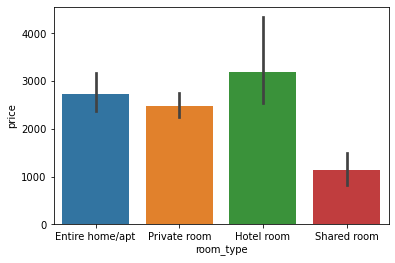

In [13]:
sns.barplot(x='room_type',y='price',data=df)

### how much each type of rooms is availble in avg?

In [14]:
df.groupby('room_type')['availability_365'].mean().sort_values(ascending=False)

room_type
Hotel room         251.580431
Shared room        221.672878
Entire home/apt    221.095926
Private room       217.876672
Name: availability_365, dtype: float64

<AxesSubplot:xlabel='room_type'>

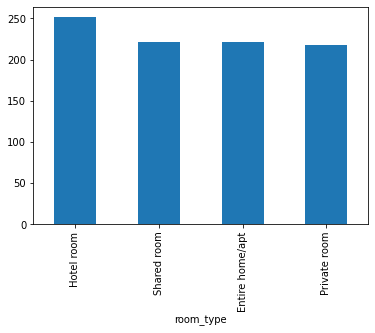

In [15]:
df.groupby('room_type')['availability_365'].mean().sort_values(ascending=False).plot(kind='bar')

In [16]:
df.sample(2)

id                                               name    host_id  \
10375  43547359  Rental unit in เขต สาทร · ★4.63 · 1 bedroom · ...  341188013   
902     7398876  Rental unit in Bangkok · 2 bedrooms · 2 beds ·...   28498493   

      host_name neighbourhood  latitude  longitude        room_type  price  \
10375      Kara        Sathon  13.71229  100.52019  Entire home/apt    776   
902    Tharinee    Rat Burana  13.67666  100.51842  Entire home/apt   2857   

       minimum_nights  number_of_reviews last_review reviews_per_month  \
10375               1                 30  2023-06-08              0.82   
902                30                  0           0                 0   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
10375                              68               364                     18  
902                                 1               358                      0

### What are the top 10 neighbourhoods that have rooms?

In [17]:
df['neighbourhood'].value_counts().head(10)

Vadhana         2811
Khlong Toei     2616
Huai Khwang     1552
Ratchathewi     1323
Sathon           905
Bang Rak         859
Chatu Chak       674
Phra Nakhon      665
Phra Khanong     651
Bang Na          505
Name: neighbourhood, dtype: int64

<AxesSubplot:>

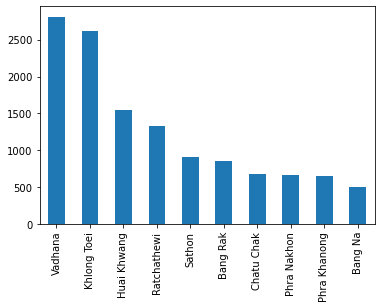

In [18]:
 df['neighbourhood'].value_counts().head(10).plot(kind='bar')

### What are the less 10 neighbourhoods that have rooms?

In [19]:
df['neighbourhood'].value_counts().tail(10)

Saphan Sung        53
Sai Mai            43
Taling Chan        41
Khlong Sam Wa      36
Thung khru         23
Bang Khun thain    22
Nong Chok          16
Thawi Watthana     15
Nong Khaem          8
Bang Bon            7
Name: neighbourhood, dtype: int64

<AxesSubplot:>

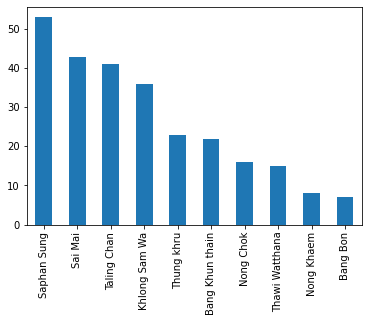

In [20]:
 df['neighbourhood'].value_counts().tail(10).plot(kind='bar')

### What are the most popular room type in Vadhana?

In [21]:
df[df['neighbourhood']=='Vadhana']['room_type'].value_counts()

Entire home/apt    1987
Private room        689
Hotel room           75
Shared room          60
Name: room_type, dtype: int64

<AxesSubplot:>

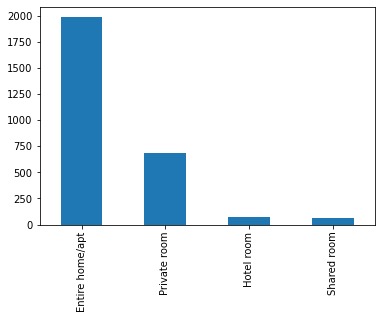

In [22]:
df[df['neighbourhood']=='Vadhana']['room_type'].value_counts().plot(kind='bar')